# Arbol de clasificación simple

In [1]:
from sklearn.tree import DecisionTreeClassifier                                 # importando el clasificador de arboles de decisiones.
from sklearn.model_selection import train_test_split ,cross_val_score           # Para dividir los datos en entrenamiento y test.
from sklearn.tree import export_graphviz                                        # Para graficar arbol
import graphviz                                                                 # Para graficar arbol
import matplotlib.pyplot as plt                                                 # Para graficar arbol
import numpy as np
import pandas as pd


from sklearn.model_selection import GridSearchCV
from sklearn import tree, preprocessing, model_selection, ensemble
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, mean_squared_error, make_scorer, plot_confusion_matrix, classification_report
from sklearn import metrics

In [215]:
url = 'https://raw.githubusercontent.com/joaramirezcu/Mineria_Proyecto/master/Skyserver_SQL2_27_2018%206_51_39%20PM.csv'
data_f1 = pd.read_csv(url, error_bad_lines=False)
data_f1=data_f1.drop(['rerun'], axis=1)
data_f1=data_f1.drop(['redshift'], axis=1)
data_f1.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,3306,54922,512


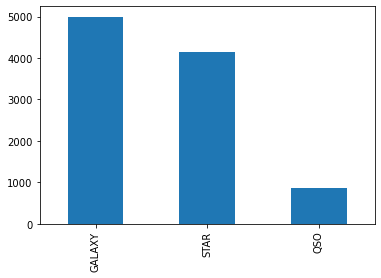

In [216]:
data_f1['class'].value_counts().plot(kind='bar')

Al generar una partición sobre el conjunto de datos del Sloan tenemos:

In [218]:
# Separamos los predictores (X) de la variable respuesta (y)
X = data_f1.loc[:, data_f1.columns != 'class']
y = data_f1['class']
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Tengase en cuenta el tipo de objeto que nos aporta X, y, todo para poder interpretar las entradas del objeto estimador tree.DecisionClassifier 

In [223]:
# Dividimos los datos en entrenamiento (80%) y test (20%) de forma aleatoria
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, random_state=0, test_size=0.2)

Para ajustar un árbol simple de clasificación, implementaremos la clase tree.DecisionClassifier de la librería sklearn. Utilizaremos como criterio para medir la calidad de la división de los nodos el Accuracy. Métricas disponibles para clasificación: https://scikit-learn.org/stable/modules/model_evaluation.html

In [220]:
# Es necesario codificar la variable categorica predictora "class"  a numerica
#Y_train = Y_train.map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})
#Y_test = Y_test.map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})
#print(type(Y_train))

<class 'pandas.core.series.Series'>


In [221]:
#from sklearn import preprocessing
#Y_train = preprocessing.label_binarize(Y_train, classes=[0, 1, 2])
#Y_test = preprocessing.label_binarize(Y_test, classes=[0, 1, 2])
#print(Y_train.shape)
#print(type(Y_train))

(8000, 3)
<class 'numpy.ndarray'>


## Estableciendo parámetros y 

La función *DecisionTreeClassifier* ofrece un parámetro para la post-poda del árbol para equilibrar la precisión con su tamaño: ccp_alpha (cost complexity o poda por coste-complejidad). La complejidad viene dada por el número de nodos terminales. Alpha indica el parámetro de complejidad (alpha ≥ 0). Valores mayores de este parámetro aumentan el número de nodos podados.

In [225]:
from sklearn.tree import DecisionTreeClassifier

# Establecemos un grid con las combinaciones de valores que queremos evaluar. Combinaciones resultantes=2*3*5*3*3=270
grid_hiperparametros = {'criterion': ['gini', 'entropy'], #funcion para medir la calidad de las divisiones
                        'max_features': [3, 4, 5], #nº de variables a tener en cuenta para las divisiones 
                        'min_samples_split': [10, 20, 30, 40, 50], #nº minimo de observaciones para dividir nodo
                        'max_depth': [3, 4, 5], # profundidad maxima (pre-poda)
                        'ccp_alpha': [0.001, 0.002, 0.003]} 

# Definimos las métricas de interés
metricas = ['accuracy']

# Definimos los parámetros de la búsqueda por validación cruzada
busqueda_grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 0), #tipo de modelo
                             param_grid = grid_hiperparametros, 
                             cv = 10, #folds
                             scoring = metricas, 
                             refit='accuracy',
                             #return_train_score = True,
                             n_jobs = -1)


# Aplicamos la busqueda
busqueda_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'ccp_alpha': [0.001, 0.002, 0.003],
                         'criterion': ['gini', 'entropy'],
        

In [226]:
# Valores que devuelve la busqueda grid
busqueda_grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_ccp_alpha', 'param_criterion', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'split9_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy'])

In [239]:
# Mejores hiperparametros sobre los datos hold-out
print('Conjunto de hiperparámetros óptimos:\n', busqueda_grid.best_params_,
     '\nAccuracy +- std =', round(busqueda_grid.cv_results_['mean_test_accuracy'][busqueda_grid.best_index_],3),
     '+-', round(busqueda_grid.cv_results_['std_test_accuracy'][busqueda_grid.best_index_],3))

#   ,'\nROC AUC +- std = ', round(busqueda_grid.cv_results_['mean_test_roc_auc'][busqueda_grid.best_index_],3),
#     '+-', round(busqueda_grid.cv_results_['std_test_roc_auc'][busqueda_grid.best_index_],3)

Conjunto de hiperparámetros óptimos:
 {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_split': 20} 
Accuracy +- std = 0.871 +- 0.015


Luego a la variable arbol se le pasará el clasificacdor de arbol de desiciones.

In [250]:
modelo_arbolC = DecisionTreeClassifier(criterion = 'gini', 
                                       max_features = 6,
                                       min_samples_split = 10, #nº minimo de observaciones para dividir nodo
                                       max_depth = 5, #profundidad maxima
                                       ccp_alpha = 0.001,
                                       random_state = 0) #semilla
# Entrenamos el modelo con los datos de entrenamiento 
modelo_arbolC.fit(X_train, Y_train)
print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(Y_train, modelo_arbolC.predict(X_train))))
print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(Y_test, modelo_arbolC.predict(X_test))))

Decision Tree Training Accuracy: 0.884
Decision Tree Training Accuracy: 0.875


Tengase en cuenta que algunos valores por default para **DecisionTreeClassifier** estan dados por:

In [229]:
export_graphviz(modelo_arbolC, out_file='arbolC.dot',  feature_names=X_train.columns.tolist(), impurity=False , filled=True)

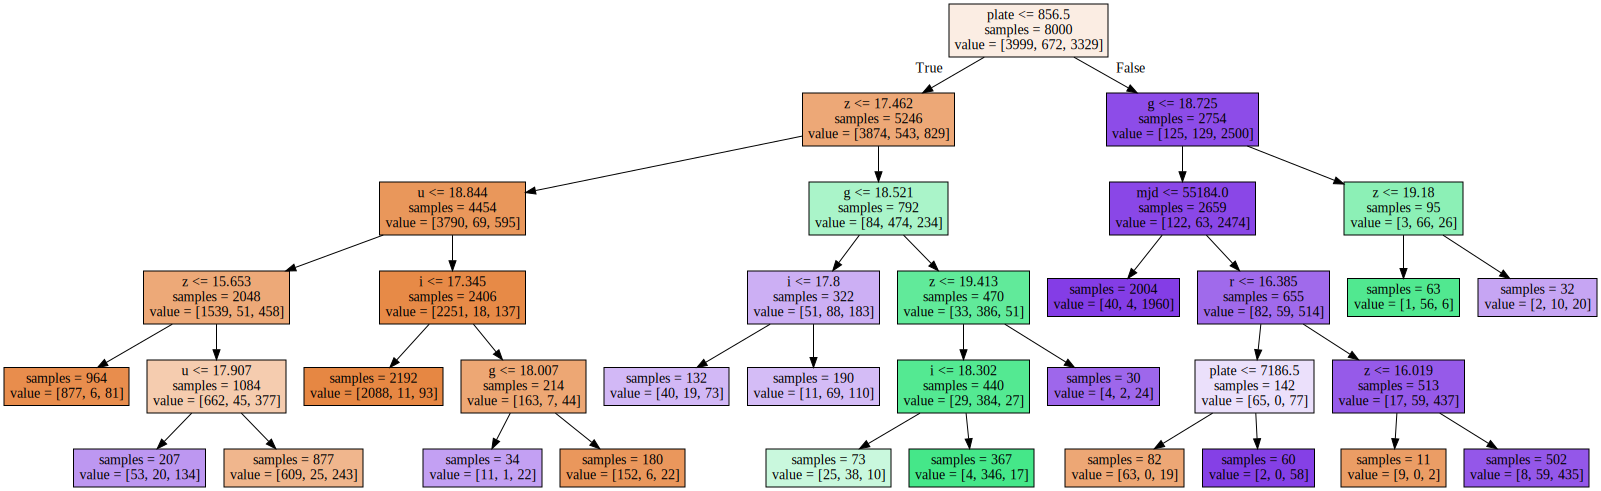

In [230]:
with open('arbolC.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

## Evaluación

In [231]:
# TEST

# Obtenemos las predicciones del modelo sobre los datos de test
Y_pred = modelo_arbolC.predict(X_test)

print(X_test.shape)
print(Y_pred.shape)
#classification_report(Y_test, Y_pred)

(2000, 15)
(2000,)


Métricas en test:
               precision    recall  f1-score   support

      GALAXY       0.87      0.94      0.90       999
         QSO       0.85      0.67      0.75       178
        STAR       0.89      0.84      0.86       823

    accuracy                           0.88      2000
   macro avg       0.87      0.82      0.84      2000
weighted avg       0.88      0.88      0.87      2000



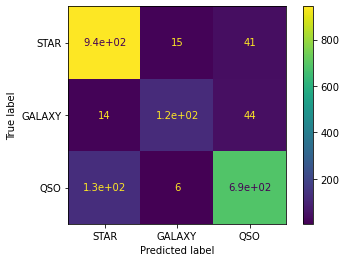

In [237]:
# Metricas
print('Métricas en test:\n', classification_report(Y_test, Y_pred))#,'\nROC AUC =', round(roc_auc_score(Y_test, Y_pred), 3), la curva roc_auc no admite datos numerico

# Matriz de confusion (0=CH, 1=MM)
plot_confusion_matrix(modelo_arbolC, X_test, Y_test, display_labels = y.unique().tolist())

Para poder interpretar la anterior matriz de confusión ha de tenerse en cuenta los valores que la componene, en este orden de ideas se puede ver que ....


...


* 

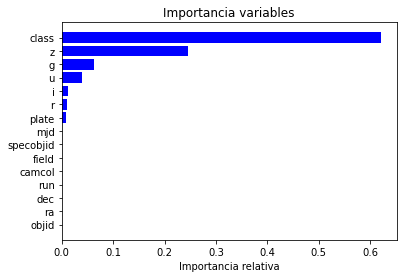

In [251]:
# Recuperamos los valores de importancia del modelo ajustado
importancias = modelo_arbolC.feature_importances_

# Ordenamos los valores de importancia en orden descendiente
indices = np.argsort(importancias)

X = data_f1.loc[:, data_f1.columns != 'Salary']
plt.title('Importancia variables')
plt.barh(range(len(indices)), importancias[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

Aqui se puede ver que las variables que más se consideranco en el arbol de clasifiación son **class** y las que representan las 5 bandas del telescopio seegun el sistema de magnitud astronomica de Thuan-Gunn (u,g,r,i,z)